In [376]:
# importing Libraries required for analysis
import os as os
import pandas as pd
import numpy as np
import matplotlib as mp
from matplotlib import pyplot as plt
import seaborn as sns
import glob
from numpy import where as IF
%matplotlib inline
pd.set_option('display.max_columns', 500)

In [377]:
# Changing the path of Dir and seeting it as per the files saved in the system
os.getcwd()
os.chdir('D:\Course\UPGRAD\Assignments\GDP Analysis\GDP Assignment Dataset\Part1A')
stwisegdp=pd.read_csv("Statewise_GDP_at_current_Price_on_yearly_basis.csv")

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 9-10: truncated \UXXXXXXXX escape (<ipython-input-377-2b277b0cbb3b>, line 3)

In [ ]:
stwisegdp.info()

In [ ]:
# Will dsiplay the numerical statistics about the data frame loaded and I have rounded it to 2 decimals for clear understanding
round(stwisegdp.describe(),4)

# Part I-A:

### Remove the rows: '(% Growth over the previous year)' and 'GSDP - CURRENT PRICES (` in Crore)' for the year 2016-17.

In [ ]:
# Removing the rows for column with data as follows:'(% Growth over the previous year)' and 'GSDP - CURRENT PRICES (` in Crore)' for the year 2016-17
stwisegdp.drop([5,10],inplace=True)
stwisegdp.reset_index(drop=True)

### Calculate the average growth of states for the duration 2013-14, 2014-15 and 2015-16 by taking the mean of the row '(% Growth over previous year)'.

In [ ]:
# Storing data which has "Items  Description" as '(% Growth over previous year)' and all "Duration" except '2012-13'.
fltrstwsegdp= stwisegdp[(stwisegdp['Items  Description'] == '(% Growth over previous year)') & (stwisegdp.Duration != '2012-13')]

In [ ]:
# Storing the grouped by data into a variable and then taking Mean/Average of it.
graph1=fltrstwsegdp.groupby(['Items  Description']).mean()

In [ ]:
# Display data after taking average
graph1

In [ ]:
# Transposed the data from horizontal view to VEertical format.
graph1.reset_index(drop=True)
graph1=graph1.transpose()

In [ ]:
graph1

In [378]:
graph1.dropna(inplace=True)

In [379]:
# Renaming Columns Names
graph1=graph1.rename(columns={'Items  Description':'State','(% Growth over previous year)':'Average % Growth over previous year'})

In [380]:
graph1

Items Description,Average % Growth over previous year
Andhra Pradesh,14.033333
Arunachal Pradesh,14.413333
Assam,12.650000
Bihar,13.603333
Chhattisgarh,13.703333
Goa,6.033333
Gujarat,11.126667
Haryana,11.846667
Himachal Pradesh,12.280000
Jammu & Kashmir,10.900000


### Compare the calculated values and plot them for the states. Make appropriate transformations, if necessary, to plot the data. Report the average growth rates of the various states:

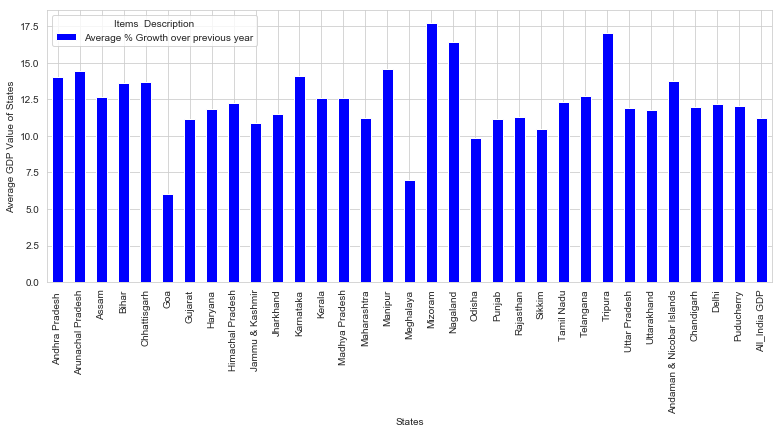

In [381]:
# Plotting graph to find out states that have been growing consistently fast, and which ones have been struggling?
# Adjusting the figsize to draw the graph. Here subplot(1,1) mean the canvas required to draw the graph
# figsize=(16,5) is for the graph size i.e 13 rows and 5 column sized graph will be fit on the suplot(1,1)
fig,ax=plt.subplots(1,1,figsize=(13,5)) 
# Drawing Bar graph which has Grey colored bars in it
graph1.plot(kind="bar",ax=ax,color='Blue')
# xticks helps in rotating the Axis points.
plt.xticks(rotation=90)
# Title to be seen on X-Axis is passed in xlabel.
plt.xlabel('States') 
# Title to be seen on Y-Axis is passed in ylabel.
plt.ylabel('Average GDP Value of States')
plt.show()

### Which states have been growing consistently fast, and which ones have been struggling?

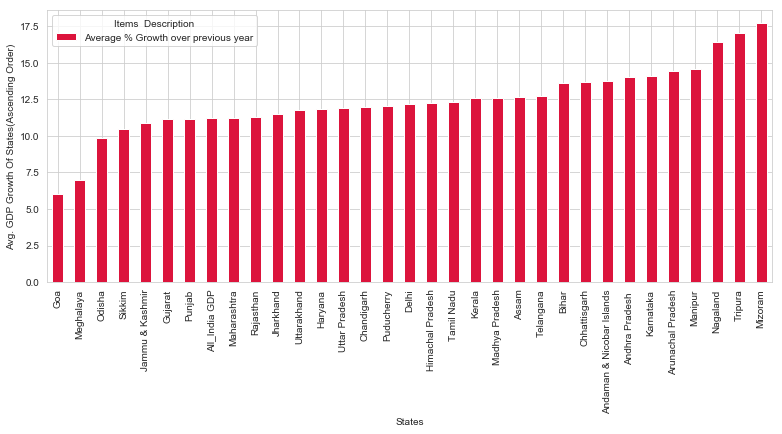

In [382]:
# Plotting graph to see states which have been growing consistently fast, and which ones have been struggling in an ascending order
fig,ax=plt.subplots(1,1,figsize=(13,5))
graph1.sort_values(['Average % Growth over previous year']).plot(kind="bar",ax=ax,color='Crimson')
plt.xticks(rotation=90)
plt.xlabel('States') 
plt.ylabel('Avg. GDP Growth Of States(Ascending Order)')
plt.show()

#### As we can see from the above graph Goa is having the least GDP while, Mizoram is having the Highest. 
#### As per the graph we can see that there is a consistent growth in the eastern states of India like Manipur, Nagaland, Tripura and Mizoram.


### What has been the average growth rate of your home state, and how does it compare to the national average over this duration?

### <span style="color:Red">Answer:</span> <span style="color:Blue">As we can see the National Average is approx. 11% and my Home State i.e Gujarat also have similar value. Also Gujarat needs to give more output to contribute to overall Country GDP.</span>

### Plot the total GDP of the states for the year 2015-16:

In [288]:
gdp1516=stwisegdp.loc[(stwisegdp['Items  Description']=='GSDP - CURRENT PRICES (` in Crore)') & (stwisegdp['Duration']=='2015-16')] 
# Considering only GDP of states in the year 2015-16
#gdp1516 = tgdp

In [289]:
gdp1516.reset_index(drop=True,inplace=True)

In [290]:
gdp1516.drop(['Items  Description','Duration'],axis='columns',inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [291]:
gdp1516=gdp1516.transpose()

In [292]:
gdp1516=gdp1516.loc[gdp1516.index!='All_India GDP'] # Removing data of All india GDP from the dataframe that has to be plotted.

In [293]:
gdp1516=gdp1516.dropna() # dropping records which have NaN values

In [294]:
gdp1516

,0
Andhra Pradesh,609934.0
Arunachal Pradesh,18784.0
Assam,224234.0
Bihar,413503.0
Chhattisgarh,260776.0
Goa,45002.0
Gujarat,994316.0
Haryana,485184.0
Jammu & Kashmir,118387.0
Jharkhand,241955.0


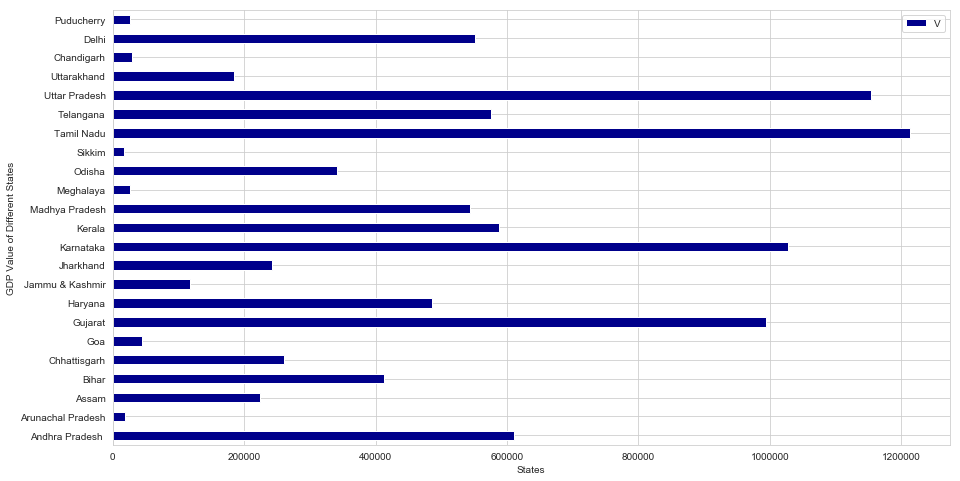

In [295]:
fig,ax=plt.subplots(1,1,figsize=(15,8))
sns.set_style("whitegrid")
gdp1516.plot(kind='Barh',ax=ax,color='DarkBlue')
plt.xticks(rotation=0)
plt.legend('Value')
plt.xlabel('States') 
plt.ylabel('GDP Value of Different States')
plt.show()

### Identify the top 5 and the bottom 5 states based on total GDP.

In [296]:
gdp1516=gdp1516.sort_values([0]) # Sorting values to fetch top 5 and lowest 5 states

In [297]:
low5=gdp1516.head(5) # Storing lowest 5 States in low5

In [298]:
top5=gdp1516.tail(5) # Storing top 5 States in top5

In [299]:
graph2=pd.concat([low5,top5]) # concating the Top 5 and Lowest 5 states to plot on graph.

### Identified Top 5 States and Lowest 5 States and Plotting it on the Graph.

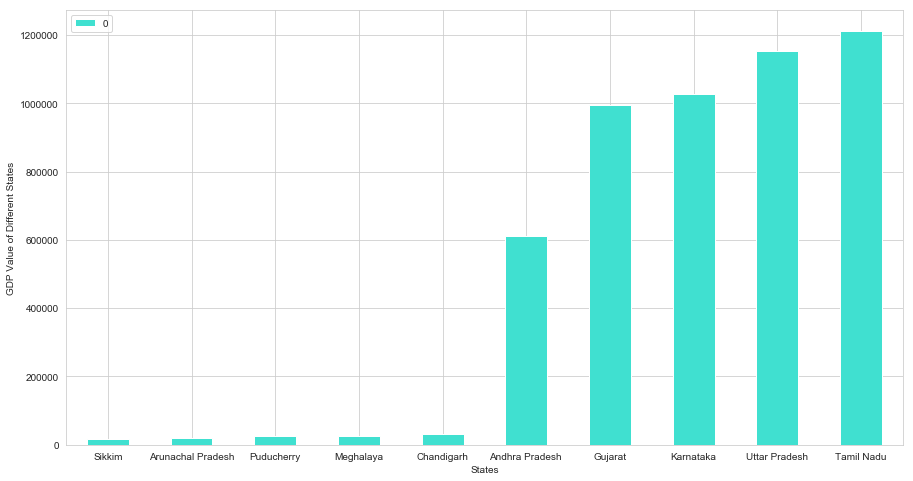

In [300]:
fig,ax=plt.subplots(1,1,figsize=(15,8))
graph2.plot(kind='Bar',ax=ax,color='Turquoise')
plt.xticks(rotation=0)
ax.legend(loc='upper left')
plt.xlabel('States') 
plt.ylabel('GDP Value of Different States')
plt.show()

# Part I-B:

### For the analysis below, use Data I-B. You can also use Data I-B along with Data I-A if required. Also, perform the analysis only for the duration 2014-15. 

In [301]:
# Path where all the files are stored
path = r'D:\Course\UPGRAD\Assignments\GDP Analysis\GDP Assignment Dataset\Part_1B'

In [302]:
# Reading all the paths
all_files = glob.glob(path + "/*.csv")

In [303]:
all_files

['D:\\Course\\UPGRAD\\Assignments\\GDP Analysis\\GDP Assignment Dataset\\Part_1B\\NAD-Andaman_Nicobar_Islands-GSVA_cur_2014-15.csv',
 'D:\\Course\\UPGRAD\\Assignments\\GDP Analysis\\GDP Assignment Dataset\\Part_1B\\NAD-Andhra_Pradesh-GSVA_cur_2016-17.csv',
 'D:\\Course\\UPGRAD\\Assignments\\GDP Analysis\\GDP Assignment Dataset\\Part_1B\\NAD-Arunachal_Pradesh-GSVA_cur_2015-16.csv',
 'D:\\Course\\UPGRAD\\Assignments\\GDP Analysis\\GDP Assignment Dataset\\Part_1B\\NAD-Assam-GSVA_cur_2015-16.csv',
 'D:\\Course\\UPGRAD\\Assignments\\GDP Analysis\\GDP Assignment Dataset\\Part_1B\\NAD-Bihar-GSVA_cur_2015-16.csv',
 'D:\\Course\\UPGRAD\\Assignments\\GDP Analysis\\GDP Assignment Dataset\\Part_1B\\NAD-Chandigarh-GSVA_cur_2015-16.csv',
 'D:\\Course\\UPGRAD\\Assignments\\GDP Analysis\\GDP Assignment Dataset\\Part_1B\\NAD-Chhattisgarh-GSVA_cur_2016-17.csv',
 'D:\\Course\\UPGRAD\\Assignments\\GDP Analysis\\GDP Assignment Dataset\\Part_1B\\NAD-Delhi-GSVA_cur_2016-17.csv',
 'D:\\Course\\UPGRAD\\Assignm

In [304]:
# Empty list to add all the dataframes
li = []

In [305]:
# Loop to read each file with the path given in the filename variable.
for filename in all_files:
    # Reading each file as a pandas dataframe
    df = pd.read_csv(filename, index_col=None, header=0,encoding='unicode_escape')
    # Selecting only required columns
    df = df[['Item','2014-15']]
    # Transpose the data
    df = df.T
    # Taking the header row
    new_header = df.iloc[0] #grab the first row for the header
    df = df[1:] #take the data less the header row
    # Assign the new header
    df.columns = new_header 
    # Add the section name from the filename
    df['Section'] = filename.split('\\')[-1].split('.')[0].split('-')[1]
    # Append the final DF to the list
    li.append(df)

In [306]:
# Creating a final DF by joining all the df's in the list li
frame = pd.concat(li, axis=0, ignore_index=True,sort=True)

In [307]:
# Checking total number of rows and Columns in the dataframe
frame.shape

(31, 38)

In [308]:
# Storing the main dataframe in another dataframe to perform operations.
framedata=frame

In [309]:
framedata

,"Agriculture, forestry and fishing",Air transport,Communication & services related to broadcasting,Construction,Crops,"Electricity, gas, water supply & other utility services",Financial services,Fishing and aquaculture,Forestry and logging,Gross State Domestic Product,Hotels & restaurants,Livestock,Manufacturing,Mining and quarrying,Other services,Per Capita GSDP (Rs.),Population ('00),Primary,Public administration,Railways,"Real estate, ownership of dwelling & professional services",Road transport,Road transport*,Road transport**,Secondary,Section,Services incidental to transport,Services incidental to transport*,Storage,Subsidies on products,TOTAL GSVA at basic prices,Taxes on Products,Tertiary,Trade & repair services,Trade & repair services*,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",Water transport
0,76670,8380,7548,69302,34026,30607,13462,18451,4634,572094,3135,19560,6650,18738,90292,138858,4120,95409,97359,NaN,45499,19313,NaN,NaN,106559,Andaman_Nicobar_Islands,24375,NaN,41,13916,574506,11504,372538,53143,NaN,56278,69648,9991
1,14819416,14900,928756,4664889,7893514,1151729,1900863,2270664,346160,52646842,517400,4309078,4672266,1484300,4215389,104977,501510,16303716,2200897,424228,4405409,2816000,NaN,NaN,10488884,Andhra_Pradesh,780200,NaN,18700,1690800,48825542,5512100,22032942,3716000,NaN,4233400,5076984,94200
2,686117,0,19568,147842,415520,113527,25207,8193,224017,1676119,3625,38387,26120,30842,218728,112718,14870,716959,243867,59,48418,15467,NaN,NaN,287489,Arunachal_Pradesh,109,NaN,0,30272,1636292,70099,631844,56796,NaN,60421,35203,0
3,3855548,26223,357619,1733568,2890544,296587,543651,529539,261987,19809800,110904,173478,2002936,1471149,1795658,60621,326780,5326697,1373611,252509,1412466,507668,NaN,NaN,4033091,Assam,35739,NaN,10308,582406,18666897,1725309,9307109,2876251,NaN,2987155,1194568,4502
4,7951890,13599,919427,3449763,4688237,345168,1178022,653224,550132,37391988,366982,2060296,2189965,68107,4587589,33954,1101240,8019997,2078171,462413,3740641,1572288,NaN,NaN,5984896,Bihar,166600,NaN,10618,2006421,36184863,3213546,22179969,7081391,NaN,7448373,3147173,2228
5,16233,12391,46399,133321,1659,29741,373045,194,388,2784426,74860,13992,149631,179,156543,250398,11120,16412,183889,1070,598448,54468,NaN,NaN,312693,Chandigarh,33211,NaN,763,23309,2755113,52622,2426008,890921,NaN,965781,148302,0
6,3948847,9507,294552,2669855,2613371,1198438,739057,385483,597785,23498180,121407,352208,4370593,2451970,1112232,86860,270530,6400817,867982,159176,2462166,386628,NaN,NaN,8238886,Chhattisgarh,5232,NaN,16675,1332092,22228481,2601791,7588778,1414164,NaN,1535571,871770,0
7,250568,420460,874588,2048788,64959,971255,6974870,978,861,49242422,537028,183770,2749307,963777,3829385,274041,179690,1214345,2008191,293836,11733335,718343,NaN,NaN,5769350,Delhi,3259417,NaN,29922,392546,43023249,6611719,36039554,5359605,NaN,5896633,5597141,574
8,308507,46359,44028,165819,140421,204110,233618,122201,15744,4063307,37434,30141,1177608,3622,180431,271793,14950,312129,346486,15649,407099,46171,NaN,NaN,1547536,Goa,19272,NaN,357,61854,3597882,527279,1738217,343492,NaN,380927,189656,17820
9,1.377e+07,NaN,1.24252e+06,5.52602e+06,9.67109e+06,3.40998e+06,4.60664e+06,638357,761616,8.95027e+07,NaN,2.69891e+06,2.40875e+07,2.11722e+06,3.12341e+06,141263,633590,1.58872e+07,2.5762e+06,511593,5.1795e+06,NaN,NaN,NaN,3.30235e+07,Gujarat,NaN,2.74416e+06,57634,1.98155e+06,7.91311e+07,1.23532e+07,3.02204e+07,1.01787e+07,NaN,1.01787e+07,4.55591e+06,NaN


### Filter out the union territories (Delhi, Chandigarh, Andaman and Nicobar Islands, etc.) for further analysis, as they are governed directly by the centre, not state governments.

In [310]:
# Dropping union territories by passing its index.
framedata.drop([0,5,7,22],inplace=True)

In [311]:
framedata

,"Agriculture, forestry and fishing",Air transport,Communication & services related to broadcasting,Construction,Crops,"Electricity, gas, water supply & other utility services",Financial services,Fishing and aquaculture,Forestry and logging,Gross State Domestic Product,Hotels & restaurants,Livestock,Manufacturing,Mining and quarrying,Other services,Per Capita GSDP (Rs.),Population ('00),Primary,Public administration,Railways,"Real estate, ownership of dwelling & professional services",Road transport,Road transport*,Road transport**,Secondary,Section,Services incidental to transport,Services incidental to transport*,Storage,Subsidies on products,TOTAL GSVA at basic prices,Taxes on Products,Tertiary,Trade & repair services,Trade & repair services*,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",Water transport
1,14819416,14900,928756,4664889,7893514,1151729,1900863,2270664,346160,52646842,517400,4309078,4672266,1484300,4215389,104977,501510,16303716,2200897,424228,4405409,2816000,NaN,NaN,10488884,Andhra_Pradesh,780200,NaN,18700,1690800,48825542,5512100,22032942,3716000,NaN,4233400,5076984,94200
2,686117,0,19568,147842,415520,113527,25207,8193,224017,1676119,3625,38387,26120,30842,218728,112718,14870,716959,243867,59,48418,15467,NaN,NaN,287489,Arunachal_Pradesh,109,NaN,0,30272,1636292,70099,631844,56796,NaN,60421,35203,0
3,3855548,26223,357619,1733568,2890544,296587,543651,529539,261987,19809800,110904,173478,2002936,1471149,1795658,60621,326780,5326697,1373611,252509,1412466,507668,NaN,NaN,4033091,Assam,35739,NaN,10308,582406,18666897,1725309,9307109,2876251,NaN,2987155,1194568,4502
4,7951890,13599,919427,3449763,4688237,345168,1178022,653224,550132,37391988,366982,2060296,2189965,68107,4587589,33954,1101240,8019997,2078171,462413,3740641,1572288,NaN,NaN,5984896,Bihar,166600,NaN,10618,2006421,36184863,3213546,22179969,7081391,NaN,7448373,3147173,2228
6,3948847,9507,294552,2669855,2613371,1198438,739057,385483,597785,23498180,121407,352208,4370593,2451970,1112232,86860,270530,6400817,867982,159176,2462166,386628,NaN,NaN,8238886,Chhattisgarh,5232,NaN,16675,1332092,22228481,2601791,7588778,1414164,NaN,1535571,871770,0
8,308507,46359,44028,165819,140421,204110,233618,122201,15744,4063307,37434,30141,1177608,3622,180431,271793,14950,312129,346486,15649,407099,46171,NaN,NaN,1547536,Goa,19272,NaN,357,61854,3597882,527279,1738217,343492,NaN,380927,189656,17820
9,1.377e+07,NaN,1.24252e+06,5.52602e+06,9.67109e+06,3.40998e+06,4.60664e+06,638357,761616,8.95027e+07,NaN,2.69891e+06,2.40875e+07,2.11722e+06,3.12341e+06,141263,633590,1.58872e+07,2.5762e+06,511593,5.1795e+06,NaN,NaN,NaN,3.30235e+07,Gujarat,NaN,2.74416e+06,57634,1.98155e+06,7.91311e+07,1.23532e+07,3.02204e+07,1.01787e+07,NaN,1.01787e+07,4.55591e+06,NaN
10,8.01524e+06,NaN,479658,3.70257e+06,4.63673e+06,1.10192e+06,1.67149e+06,110080,352254,4.37462e+07,168535,2.91617e+06,7.75692e+06,25186,2.00158e+06,164077,266620,8.04042e+06,1.03638e+06,423873,6.97018e+06,1.45236e+06,NaN,NaN,1.25614e+07,Haryana,190269,NaN,14459,1.06787e+06,3.98284e+07,4.98567e+06,1.92266e+07,4.81778e+06,NaN,4.98632e+06,2.56062e+06,NaN
11,1514981,3979,194266,808256,853758,767268,362521,9968,540950,10436879,121333,110304,2543637,33385,923164,147330,70840,1548366,553974,2528,1125937,349608,NaN,NaN,4119162,Himachal_Pradesh,1724,NaN,129,259291,9800853,895317,4133326,494162,NaN,615496,552234,0
12,3211065,6716,323214,1789834,2094466,337489,551441,108947,445149,21710718,151163,562503,4114148,2037289,1375410,62091,349660,5248354,1088325,472702,1656784,649648,NaN,NaN,6241471,Jharkhand,17436,NaN,306,411619,19623166,2499171,8133341,1840196,NaN,1991359,1470022,0


### Plot the GDP per capita for all the states.

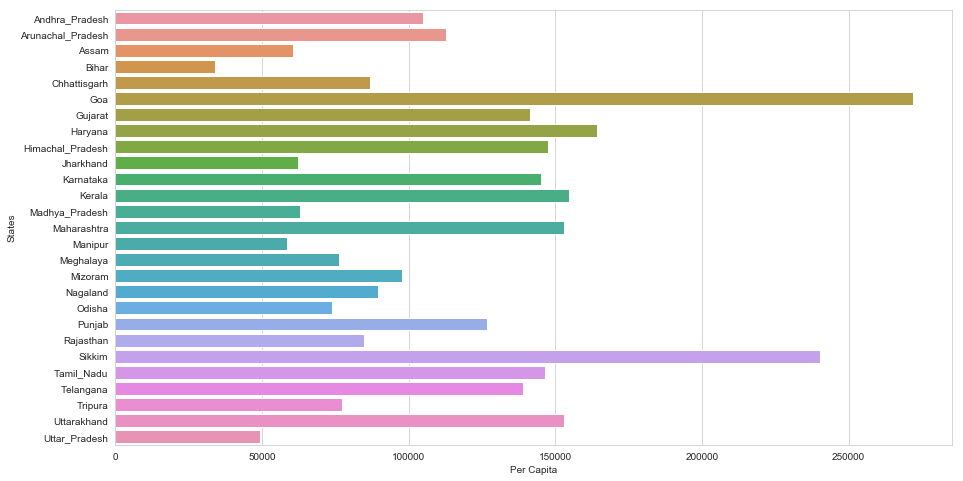

In [312]:
# Plotting Hotizontal Bar Graph of all States as per its GDP per capita.
fig,ax=plt.subplots(1,1,figsize=(15,8)) # defining the area for graph to be plotted
sns.set_style("whitegrid")
sns.barplot(data=framedata,x='Per Capita GSDP (Rs.)',y='Section',ax=ax) # plotting the graph using Seaborn
# framedata.plot(kind='barh',x='Section',y='Per Capita GSDP (Rs.)',ax=ax) # plotting graph using python
plt.xticks(Rotation=0) # X axis points can be rotated/tilted accodring to the degree passed into it.
plt.xlabel('Per Capita') # Applying X-Axis Title
plt.ylabel('States') # Applying Y-Axis Title
plt.show()

### Identify the top 5 and the bottom 5 states based on the GDP per capita.

In [313]:
framedata=framedata.sort_values(['Per Capita GSDP (Rs.)']) # sorting data framedata in Ascending order
framedata.reset_index(drop=True,inplace=True)
top5val=framedata.head(5) # Storing the Top 5 states into top5val

In [314]:
top5val # displaying top 5 states

,"Agriculture, forestry and fishing",Air transport,Communication & services related to broadcasting,Construction,Crops,"Electricity, gas, water supply & other utility services",Financial services,Fishing and aquaculture,Forestry and logging,Gross State Domestic Product,Hotels & restaurants,Livestock,Manufacturing,Mining and quarrying,Other services,Per Capita GSDP (Rs.),Population ('00),Primary,Public administration,Railways,"Real estate, ownership of dwelling & professional services",Road transport,Road transport*,Road transport**,Secondary,Section,Services incidental to transport,Services incidental to transport*,Storage,Subsidies on products,TOTAL GSVA at basic prices,Taxes on Products,Tertiary,Trade & repair services,Trade & repair services*,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",Water transport
0,7951890,13599,919427,3449763,4688237,345168,1178022,653224,550132,37391988,366982,2060296,2189965,68107,4587589,33954,1101240,8019997,2078171,462413,3740641,1572288,NaN,NaN,5984896,Bihar,166600,NaN,10618,2006421,36184863,3213546,22179969,7081391,NaN,7448373,3147173,2228
1,25097754,36582,1914737,11256450,16215212,2030625,3392275,380730,1404936,104337115,961104,7096876,12261649,901501,5034623,49450,2109940,25999255,6152124,1618742,14548185,3645747,NaN,NaN,25548724,Uttar_Pradesh,16323,NaN,171696,3287219,97516938,10107396,45968959,8476139,NaN,9437243,7404509,681
2,383140,6288,42017,143182,226583,27490,30315,35243,45831,1.80428e+06,9313,75483,49501,NaN,317930,58442,30873,383140,297078,6,159335,58974,NaN,NaN,220173,Manipur,2441,NaN,NaN,69137,1.78065e+06,92766,1.17733e+06,253637,NaN,262950,109726,NaN
3,3855548,26223,357619,1733568,2890544,296587,543651,529539,261987,19809800,110904,173478,2002936,1471149,1795658,60621,326780,5326697,1373611,252509,1412466,507668,NaN,NaN,4033091,Assam,35739,NaN,10308,582406,18666897,1725309,9307109,2876251,NaN,2987155,1194568,4502
4,3211065,6716,323214,1789834,2094466,337489,551441,108947,445149,21710718,151163,562503,4114148,2037289,1375410,62091,349660,5248354,1088325,472702,1656784,649648,NaN,NaN,6241471,Jharkhand,17436,NaN,306,411619,19623166,2499171,8133341,1840196,NaN,1991359,1470022,0


In [315]:
low5val=framedata.tail(5) # storing lowest 5 states into low5val

In [316]:
toplowval5=pd.concat([top5val,low5val]) 
# combining both the Top 5 States and Lowest 5 States using pandas concat.

In [317]:
toplowval5.reset_index(drop=True,inplace=True)

In [318]:
toplowval5 # Displaying combined data of Lowest 5 and Top 5 states

,"Agriculture, forestry and fishing",Air transport,Communication & services related to broadcasting,Construction,Crops,"Electricity, gas, water supply & other utility services",Financial services,Fishing and aquaculture,Forestry and logging,Gross State Domestic Product,Hotels & restaurants,Livestock,Manufacturing,Mining and quarrying,Other services,Per Capita GSDP (Rs.),Population ('00),Primary,Public administration,Railways,"Real estate, ownership of dwelling & professional services",Road transport,Road transport*,Road transport**,Secondary,Section,Services incidental to transport,Services incidental to transport*,Storage,Subsidies on products,TOTAL GSVA at basic prices,Taxes on Products,Tertiary,Trade & repair services,Trade & repair services*,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",Water transport
0,7951890,13599,919427,3449763,4688237,345168,1178022,653224,550132,37391988,366982,2060296,2189965,68107,4587589,33954,1101240,8019997,2078171,462413,3740641,1572288,NaN,NaN,5984896,Bihar,166600,NaN,10618,2006421,36184863,3213546,22179969,7081391,NaN,7448373,3147173,2228
1,25097754,36582,1914737,11256450,16215212,2030625,3392275,380730,1404936,104337115,961104,7096876,12261649,901501,5034623,49450,2109940,25999255,6152124,1618742,14548185,3645747,NaN,NaN,25548724,Uttar_Pradesh,16323,NaN,171696,3287219,97516938,10107396,45968959,8476139,NaN,9437243,7404509,681
2,383140,6288,42017,143182,226583,27490,30315,35243,45831,1.80428e+06,9313,75483,49501,NaN,317930,58442,30873,383140,297078,6,159335,58974,NaN,NaN,220173,Manipur,2441,NaN,NaN,69137,1.78065e+06,92766,1.17733e+06,253637,NaN,262950,109726,NaN
3,3855548,26223,357619,1733568,2890544,296587,543651,529539,261987,19809800,110904,173478,2002936,1471149,1795658,60621,326780,5326697,1373611,252509,1412466,507668,NaN,NaN,4033091,Assam,35739,NaN,10308,582406,18666897,1725309,9307109,2876251,NaN,2987155,1194568,4502
4,3211065,6716,323214,1789834,2094466,337489,551441,108947,445149,21710718,151163,562503,4114148,2037289,1375410,62091,349660,5248354,1088325,472702,1656784,649648,NaN,NaN,6241471,Jharkhand,17436,NaN,306,411619,19623166,2499171,8133341,1840196,NaN,1991359,1470022,0
5,1.60142e+06,3889,733778,1.34273e+06,866146,433880,385030,4796,339293,1.61985e+07,209033,391188,5.86625e+06,244549,982430,153076,105820,1.84597e+06,579409,21295,831307,NaN,307147,NaN,7.64286e+06,Uttarakhand,-76,NaN,660,313139,1.50768e+07,1.43486e+06,5.58798e+06,1.53407e+06,NaN,1.74311e+06,1.06669e+06,NaN
6,5930617,125029,884767,7314003,3070386,482470,2010306,704319,499808,52600230,793498,1656104,4273567,558824,5728645,154778,339843,6489442,2068915,147897,7287633,NaN,NaN,2761427,12070040,Kerala,71567,NaN,3290,822381,48233259,5189352,29673778,NaN,7763847,8557345,4020934,26956
7,8.01524e+06,NaN,479658,3.70257e+06,4.63673e+06,1.10192e+06,1.67149e+06,110080,352254,4.37462e+07,168535,2.91617e+06,7.75692e+06,25186,2.00158e+06,164077,266620,8.04042e+06,1.03638e+06,423873,6.97018e+06,1.45236e+06,NaN,NaN,1.25614e+07,Haryana,190269,NaN,14459,1.06787e+06,3.98284e+07,4.98567e+06,1.92266e+07,4.81778e+06,NaN,4.98632e+06,2.56062e+06,NaN
8,137447,0,12064,82058,114976,212499,21079,604,4529,1520933,5945,17338,550697,1329,149265,240274,6330,138776,119514,0,75330,35283,NaN,NaN,845253,Sikkim,0,NaN,0,18400,1467133,72200,483103,64624,NaN,70568,47347,0
9,308507,46359,44028,165819,140421,204110,233618,122201,15744,4063307,37434,30141,1177608,3622,180431,271793,14950,312129,346486,15649,407099,46171,NaN,NaN,1547536,Goa,19272,NaN,357,61854,3597882,527279,1738217,343492,NaN,380927,189656,17820


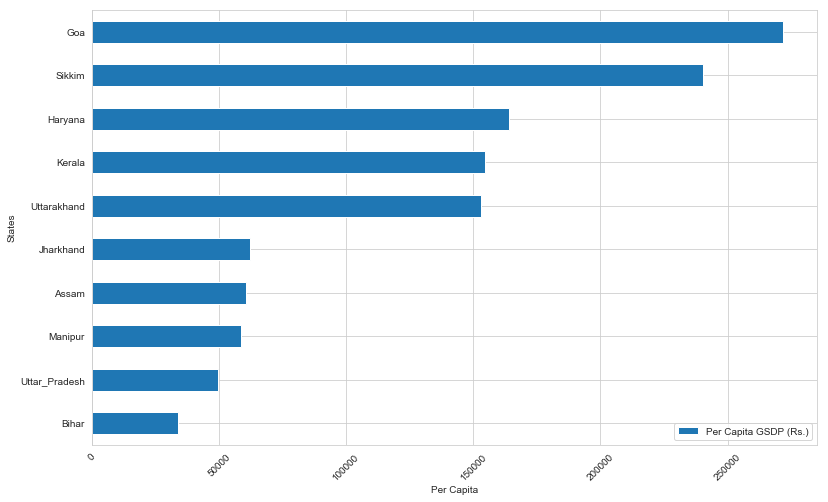

In [319]:
# Plotting Top 5 and Lowest 5 states on graph and getting insights as to which states need to improvea lot
fig,ax=plt.subplots(1,1,figsize=(13,8))
toplowval5.sort_values(['Per Capita GSDP (Rs.)']).plot(kind='barh',x='Section',y='Per Capita GSDP (Rs.)',ax=ax)
plt.xticks(Rotation=45)
plt.xlabel('Per Capita')
plt.ylabel('States')
plt.show()

### Find the ratio of the highest per capita GDP to the lowest per capita GDP.

In [320]:
# Finding Ratio of Highest per capita GDP with the lowest per capita GDP 
minmax=framedata['Per Capita GSDP (Rs.)'].max()/framedata['Per Capita GSDP (Rs.)'].min()

In [321]:
round(minmax,0)
# Rounding the per capita value and the Ratio of Highest per Capita with the lowest per capita GDP is 1:8

8.0

### Plot the percentage contribution of the primary, secondary and tertiary sectors as a percentage of the total GDP for all the states.

In [322]:
# Finding the percentage contribution of different sectors on State GSDP.
pctcontri=framedata.groupby(['Section'])['Primary','Secondary','Tertiary','Gross State Domestic Product'].sum()

In [323]:
# Creating a new column to record the % contribution of Primary sector to state GSDP.
pctcontri['Primary_Pct']=pctcontri['Primary']/pctcontri['Gross State Domestic Product']*100

In [324]:
# Creating a new column to record the % contribution of Secondary sector to state GSDP.
pctcontri['Secondary_Pct']=pctcontri['Secondary']/pctcontri['Gross State Domestic Product']*100

In [325]:
# Creating a new column to record the % contribution of Tertiary sector to state GSDP.
pctcontri['Tertiary_Pct']=pctcontri['Tertiary']/pctcontri['Gross State Domestic Product']*100

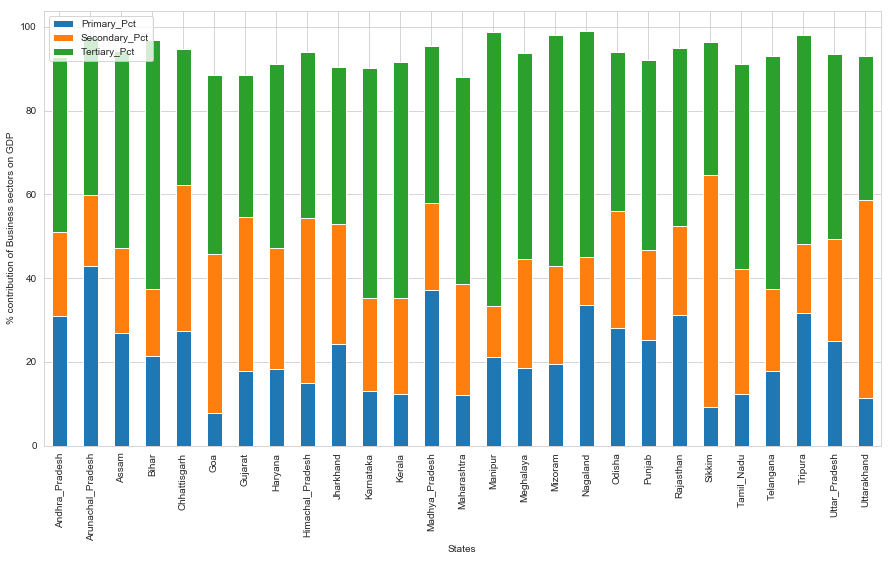

In [326]:
# Plotting Stacked Bar Graph for the the contribution of different sectors on the state GDP.
fig,ax=plt.subplots(1,1,figsize=(15,8))
pctcontri.plot(kind='bar',stacked=True,ax=ax,y=['Primary_Pct','Secondary_Pct','Tertiary_Pct'],grid=True)
plt.legend(loc='upper left')
plt.ylabel('% contribution of Business sectors on GDP')
plt.xlabel('States')
plt.show()

### Categorise the states into four groups based on the GDP per capita (C1, C2, C3, C4, where C1 would have the highest per capita GDP and C4, the lowest). The quantile values are (0.20,0.5, 0.85, 1), i.e., the states lying between the 85th and the 100th percentile are in C1; those between the 50th and the 85th percentiles are in C2, and so on.

In [351]:
# Fetching quantile info of different according to the GSDP.
quantileinfo=framedata['Per Capita GSDP (Rs.)'].quantile([0.20,0.5, 0.85, 1])

In [352]:
# Categorising each state into its respective quantile i.e C1 C2 C3 and C4.
framedata['catergory']=IF(framedata['Per Capita GSDP (Rs.)']<=quantileinfo[0.20],'C1',
                IF((framedata['Per Capita GSDP (Rs.)']>quantileinfo[0.20]) & (framedata['Per Capita GSDP (Rs.)']<=quantileinfo[0.5]),'C2',
                IF((framedata['Per Capita GSDP (Rs.)']>quantileinfo[0.50]) & (framedata['Per Capita GSDP (Rs.)']<=quantileinfo[0.85]),'C3',
                IF((framedata['Per Capita GSDP (Rs.)']>quantileinfo[0.85]),'C4',''))))

In [353]:
framedata

,"Agriculture, forestry and fishing",Air transport,Communication & services related to broadcasting,Construction,Crops,"Electricity, gas, water supply & other utility services",Financial services,Fishing and aquaculture,Forestry and logging,Gross State Domestic Product,Hotels & restaurants,Livestock,Manufacturing,Mining and quarrying,Other services,Per Capita GSDP (Rs.),Population ('00),Primary,Public administration,Railways,"Real estate, ownership of dwelling & professional services",Road transport,Road transport*,Road transport**,Secondary,Section,Services incidental to transport,Services incidental to transport*,Storage,Subsidies on products,TOTAL GSVA at basic prices,Taxes on Products,Tertiary,Trade & repair services,Trade & repair services*,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",Water transport,catergory
0,7951890,13599,919427,3449763,4688237,345168,1178022,653224,550132,37391988,366982,2060296,2189965,68107,4587589,33954,1101240,8019997,2078171,462413,3740641,1572288,NaN,NaN,5984896,Bihar,166600,NaN,10618,2006421,36184863,3213546,22179969,7081391,NaN,7448373,3147173,2228,C1
1,25097754,36582,1914737,11256450,16215212,2030625,3392275,380730,1404936,104337115,961104,7096876,12261649,901501,5034623,49450,2109940,25999255,6152124,1618742,14548185,3645747,NaN,NaN,25548724,Uttar_Pradesh,16323,NaN,171696,3287219,97516938,10107396,45968959,8476139,NaN,9437243,7404509,681,C1
2,383140,6288,42017,143182,226583,27490,30315,35243,45831,1.80428e+06,9313,75483,49501,NaN,317930,58442,30873,383140,297078,6,159335,58974,NaN,NaN,220173,Manipur,2441,NaN,NaN,69137,1.78065e+06,92766,1.17733e+06,253637,NaN,262950,109726,NaN,C1
3,3855548,26223,357619,1733568,2890544,296587,543651,529539,261987,19809800,110904,173478,2002936,1471149,1795658,60621,326780,5326697,1373611,252509,1412466,507668,NaN,NaN,4033091,Assam,35739,NaN,10308,582406,18666897,1725309,9307109,2876251,NaN,2987155,1194568,4502,C1
4,3211065,6716,323214,1789834,2094466,337489,551441,108947,445149,21710718,151163,562503,4114148,2037289,1375410,62091,349660,5248354,1088325,472702,1656784,649648,NaN,NaN,6241471,Jharkhand,17436,NaN,306,411619,19623166,2499171,8133341,1840196,NaN,1991359,1470022,0,C1
5,16235647,26746,905381,4403151,13216013,1272905,1988794,121277,965588,48198169,303890,1932769,4368833,1618373,2747805,62989,765180,17854020,2497321,498734,2660123,1369235,NaN,NaN,10044889,Madhya_Pradesh,36694,NaN,29012,2102800,46016269,4284700,18117360,5053625,NaN,5357515,2865802,0,C1
6,6422978,15354,513531,2402396,4382636,833067,1065147,460636,791463,32197092,262766,788243,5754229,2586328,2340603,73979,435220,9009306,1318221,341494,2348714,973144,NaN,NaN,8989693,Odisha,117469,NaN,22675,1209349,30255256,3151184,12256258,2886789,NaN,3149555,2034016,50349,C2
7,366521,1443,40547,150256,223330,54473,64091,9583,61166,2.44081e+06,26247,72442,433213,84529,214211,76228,32020,451050,239782,0,150409,105783,NaN,NaN,637942,Meghalaya,NaN,NaN,416,62112,2.28965e+06,213272,1.20066e+06,357727,NaN,383974,148189,NaN,C2
8,799825,NaN,66676,177899,397591,77870,86094,168961,145096,2.96666e+06,NaN,88176,228625,142391,323287,77358,38350,942216,338244,305,190704,NaN,NaN,NaN,484393,Tripura,NaN,88721,254,94002,2.91132e+06,149345,1.48471e+06,390423,NaN,390423,155956,NaN,C2
9,15044394,13469,1150955,5353326,7673441,1122888,1827413,58036,1956660,61219447,354543,5356257,6552580,4069385,4164287,84837,721610,19113780,2460364,464638,6451997,2121206,NaN,NaN,13028794,Rajasthan,47609,NaN,16584,2333442,58158386,5394503,26015812,6942748,NaN,7297290,3814461,0,C2


In [354]:
# Creating a new list of subsectors 
Sub_Sector = list(framedata.columns)
Sub_Sector.remove("Section") # Remove unwanted Columns from this list
Sub_Sector.remove("TOTAL GSVA at basic prices")
Sub_Sector.remove("catergory")
Sub_Sector.remove("Population ('00)")
Sub_Sector.remove("Tertiary")
Sub_Sector.remove("Secondary")
Sub_Sector.remove("Primary")
Sub_Sector.remove("Communication & services related to broadcasting")
Sub_Sector.remove("Construction")
Sub_Sector.remove("Crops")
Sub_Sector.remove("Livestock")
Sub_Sector.remove("Forestry and logging")
Sub_Sector.remove("Fishing and aquaculture")
Sub_Sector.remove("Trade & repair services")
Sub_Sector.remove("Hotels & restaurants")
Sub_Sector.remove("Railways")
Sub_Sector.remove("Road transport*")
Sub_Sector.remove("Road transport**")
Sub_Sector.remove("Air transport")
Sub_Sector.remove("Services incidental to transport*")
Sub_Sector.remove("Storage")
Sub_Sector.remove("Water transport")
Sub_Sector.remove("Trade & repair services*")

In [355]:
Sub_Sector

['Agriculture, forestry and fishing',
 'Electricity, gas, water supply & other utility services',
 'Financial services',
 'Gross State Domestic Product',
 'Manufacturing',
 'Mining and quarrying',
 'Other services',
 'Per Capita GSDP (Rs.)',
 'Public administration',
 'Real estate, ownership of dwelling & professional services',
 'Road transport',
 'Services incidental to transport',
 'Subsidies on products',
 'Taxes on Products',
 'Trade, repair, hotels and restaurants',
 'Transport, storage, communication & services related to broadcasting']

In [356]:
C1 = pd.DataFrame(framedata.groupby("catergory")[Sub_Sector].sum()).loc["C1"].reset_index()
C2 = pd.DataFrame(framedata.groupby("catergory")[Sub_Sector].sum()).loc["C2"].reset_index()
C3 = pd.DataFrame(framedata.groupby("catergory")[Sub_Sector].sum()).loc["C3"].reset_index()
C4 = pd.DataFrame(framedata.groupby("catergory")[Sub_Sector].sum()).loc["C4"].reset_index()
C1.sort_values(by ='C1',inplace = True,ascending=False)
C1.reset_index(drop = True,inplace = True)
C2.sort_values(by ='C2',inplace = True,ascending=False)
C2.reset_index(drop = True,inplace = True)
C3.sort_values(by ='C3',inplace = True,ascending=False)
C3.reset_index(drop = True,inplace = True)
C4.sort_values(by ='C4',inplace = True,ascending=False)
C4.reset_index(drop = True,inplace = True)

In [357]:
gdpvalue1=C1.C1[0]
gdpvalue2=C2.C2[0]
gdpvalue3=C3.C3[0]
gdpvalue4=C4.C4[0]

In [358]:
C1['pctage_contri']= (C1.C1[1:]/gdpvalue1)*100
C2['pctage_contri']= (C2.C2[1:]/gdpvalue2)*100
C3['pctage_contri']= (C3.C3[1:]/gdpvalue3)*100
C4['pctage_contri']= (C4.C4[1:]/gdpvalue4)*100

In [359]:
sum_of_c=pd.concat([C1,C2,C3,C4],axis=0,sort=True)

In [360]:
sum_of_c

,C1,C2,C3,C4,index,pctage_contri
0,233252066.0,NaN,NaN,NaN,Gross State Domestic Product,NaN
1,56735044.0,NaN,NaN,NaN,"Agriculture, forestry and fishing",24.323490
2,27484595.0,NaN,NaN,NaN,"Trade, repair, hotels and restaurants",11.783216
3,24987032.0,NaN,NaN,NaN,Manufacturing,10.712459
4,24177534.0,NaN,NaN,NaN,"Real estate, ownership of dwelling & professio...",10.365410
5,21922888.0,NaN,NaN,NaN,Taxes on Products,9.398797
6,16191800.0,NaN,NaN,NaN,"Transport, storage, communication & services r...",6.941761
7,15859015.0,NaN,NaN,NaN,Other services,6.799089
8,13486630.0,NaN,NaN,NaN,Public administration,5.781998
9,8459602.0,NaN,NaN,NaN,Subsidies on products,3.626807


In [367]:
# Performing Groupby on the concatenated data and summing the sector data category wise.
sum_of_c=sum_of_c.groupby(['index']).sum()

In [368]:
sum_of_c['pctage_contri']= round(sum_of_c['pctage_contri'],2)
sum_of_c=sum_of_c.sort_values(['pctage_contri'],ascending=False).reset_index()

In [369]:
# as the 15th record is the sum of GDP; we donot require that data for plotting graph so removing it from dataframe.
sum_of_c=sum_of_c[0:15]

In [370]:
# Final dataframe to plot on graph
sum_of_c

,index,C1,C2,C3,C4,pctage_contri
0,"Agriculture, forestry and fishing",56735044.0,42226888.0,7.520902e+07,14391809.0,75.00
1,Manufacturing,24987032.0,22038331.0,1.091965e+08,13758793.0,55.22
2,"Real estate, ownership of dwelling & professio...",24177534.0,16224118.0,9.212145e+07,14740245.0,49.65
3,"Trade, repair, hotels and restaurants",27484595.0,17245309.0,6.123886e+07,13995159.0,45.65
4,Taxes on Products,21922888.0,17122953.0,7.190204e+07,10774501.0,41.85
5,Other services,15859015.0,12815417.0,3.625366e+07,8059922.0,28.09
6,"Transport, storage, communication & services r...",16191800.0,12231484.0,3.374981e+07,6818560.0,26.26
7,Public administration,13486630.0,7927173.0,1.856782e+07,3571292.0,16.91
8,Financial services,7684498.0,5766226.0,3.629664e+07,3936489.0,16.59
9,Subsidies on products,8459602.0,6779982.0,1.300566e+07,1970502.0,11.59


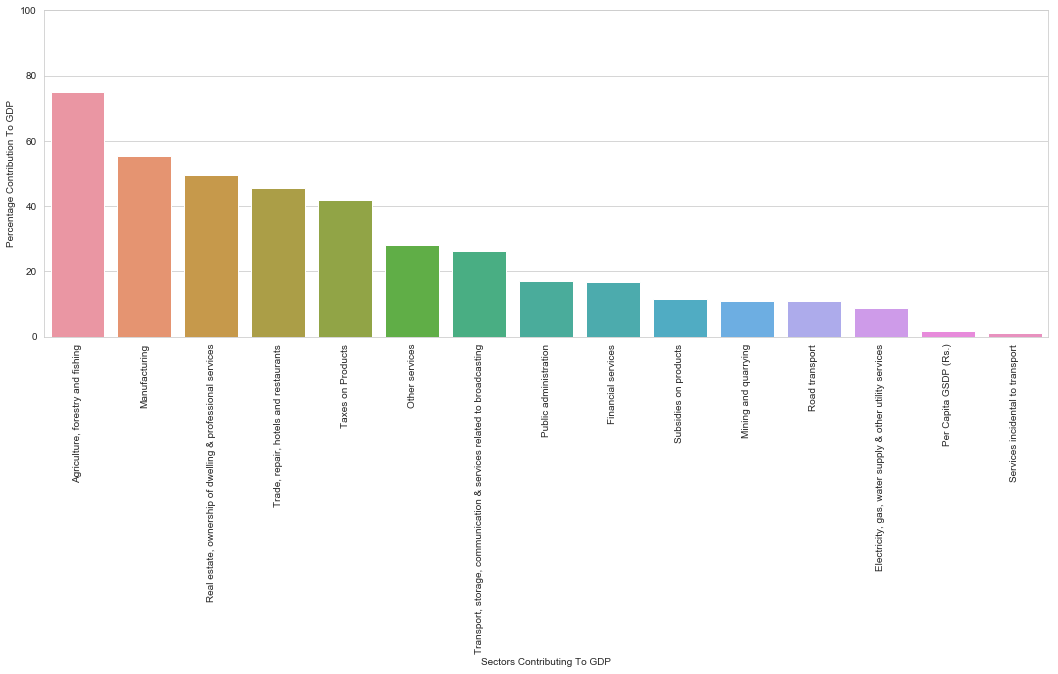

In [371]:
# plotting graph showing the sectors contributing highest in the GDP in descending order
fig,ax=plt.subplots(1,1,figsize=(18,6))
sns.barplot(data=sum_of_c,x='index',y='pctage_contri',ax=ax)
plt.xticks(Rotation=90)
plt.ylim(0,100)
plt.xlabel('Sectors Contributing To GDP')
plt.ylabel('Percentage Contribution To GDP')
plt.show()

# Part-II: GDP and Education

In [366]:
# Fetching dropout dataset into python
dropoutdetails=pd.read_csv('D:\\Course\\UPGRAD\\Assignments\\GDP Analysis\\GDP Assignment Dataset\\Part_2\\rs_session243_au570_1.1.csv')

In [343]:
# Dropout details fetched as per the required columns.
dropoutdetails=dropoutdetails[['Level of Education - State','Primary - 2014-2015','Upper Primary - 2014-2015','Secondary - 2014-2015']]

In [344]:
# Dropping union territories from the dropout details dataframe
dropoutdetails=dropoutdetails.drop([0,5,7,8,9,18,26,36])

In [345]:
dropoutdetails.reset_index(drop=True,inplace=True)

In [346]:
# Renaming column to States for ease of analysis.
dropoutdetails.rename(columns={'Level of Education - State':'States'},inplace=True)

In [347]:
# Replacing the column names in "dropoutdetails" dataframe with names as mentioned in "framedata" dataframe to perform merge operation.
dropoutdetails=dropoutdetails.replace(to_replace=['Andhra Pradesh','Arunachal Pradesh','Chhatisgarh','Himachal Pradesh','Madhya Pradesh','Tamil Nadu','Uttar Pradesh','Uttrakhand',],value=['Andhra_Pradesh','Arunachal_Pradesh','Chhattisgarh','Himachal_Pradesh','Madhya_Pradesh','Tamil_Nadu','Uttar_Pradesh','Uttarakhand'])

In [348]:
# Merging both the dataframes dropoutdetails and frameadata dataframe
mergeddata=dropoutdetails.merge(framedata,left_on='States', right_on='Section',how='inner')

In [349]:
# Displaying the merged data of both dataframe after merge operation.
mergeddata

,States,Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2014-2015,"Agriculture, forestry and fishing",Air transport,Communication & services related to broadcasting,Construction,Crops,"Electricity, gas, water supply & other utility services",Financial services,Fishing and aquaculture,Forestry and logging,Gross State Domestic Product,Hotels & restaurants,Livestock,Manufacturing,Mining and quarrying,Other services,Per Capita GSDP (Rs.),Population ('00),Primary,Public administration,Railways,"Real estate, ownership of dwelling & professional services",Road transport,Road transport*,Road transport**,Secondary,Section,Services incidental to transport,Services incidental to transport*,Storage,Subsidies on products,TOTAL GSVA at basic prices,Taxes on Products,Tertiary,Trade & repair services,Trade & repair services*,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",Water transport,catergory
0,Andhra_Pradesh,4.35,5.20,15.71,14819416,14900,928756,4664889,7893514,1151729,1900863,2270664,346160,52646842,517400,4309078,4672266,1484300,4215389,104977,501510,16303716,2200897,424228,4405409,2816000,NaN,NaN,10488884,Andhra_Pradesh,780200,NaN,18700,1690800,48825542,5512100,22032942,3716000,NaN,4233400,5076984,94200,C2
1,Arunachal_Pradesh,10.89,6.71,17.11,686117,0,19568,147842,415520,113527,25207,8193,224017,1676119,3625,38387,26120,30842,218728,112718,14870,716959,243867,59,48418,15467,NaN,NaN,287489,Arunachal_Pradesh,109,NaN,0,30272,1636292,70099,631844,56796,NaN,60421,35203,0,C3
2,Assam,7.44,10.51,27.06,3855548,26223,357619,1733568,2890544,296587,543651,529539,261987,19809800,110904,173478,2002936,1471149,1795658,60621,326780,5326697,1373611,252509,1412466,507668,NaN,NaN,4033091,Assam,35739,NaN,10308,582406,18666897,1725309,9307109,2876251,NaN,2987155,1194568,4502,C1
3,Bihar,2.09,4.08,25.90,7951890,13599,919427,3449763,4688237,345168,1178022,653224,550132,37391988,366982,2060296,2189965,68107,4587589,33954,1101240,8019997,2078171,462413,3740641,1572288,NaN,NaN,5984896,Bihar,166600,NaN,10618,2006421,36184863,3213546,22179969,7081391,NaN,7448373,3147173,2228,C1
4,Chhattisgarh,1.42,5.85,21.26,3948847,9507,294552,2669855,2613371,1198438,739057,385483,597785,23498180,121407,352208,4370593,2451970,1112232,86860,270530,6400817,867982,159176,2462166,386628,NaN,NaN,8238886,Chhattisgarh,5232,NaN,16675,1332092,22228481,2601791,7588778,1414164,NaN,1535571,871770,0,C2
5,Goa,0.20,0.07,11.15,308507,46359,44028,165819,140421,204110,233618,122201,15744,4063307,37434,30141,1177608,3622,180431,271793,14950,312129,346486,15649,407099,46171,NaN,NaN,1547536,Goa,19272,NaN,357,61854,3597882,527279,1738217,343492,NaN,380927,189656,17820,C4
6,Gujarat,0.76,6.41,25.04,1.377e+07,NaN,1.24252e+06,5.52602e+06,9.67109e+06,3.40998e+06,4.60664e+06,638357,761616,8.95027e+07,NaN,2.69891e+06,2.40875e+07,2.11722e+06,3.12341e+06,141263,633590,1.58872e+07,2.5762e+06,511593,5.1795e+06,NaN,NaN,NaN,3.30235e+07,Gujarat,NaN,2.74416e+06,57634,1.98155e+06,7.91311e+07,1.23532e+07,3.02204e+07,1.01787e+07,NaN,1.01787e+07,4.55591e+06,NaN,C3
7,Haryana,0.41,5.81,15.89,8.01524e+06,NaN,479658,3.70257e+06,4.63673e+06,1.10192e+06,1.67149e+06,110080,352254,4.37462e+07,168535,2.91617e+06,7.75692e+06,25186,2.00158e+06,164077,266620,8.04042e+06,1.03638e+06,423873,6.97018e+06,1.45236e+06,NaN,NaN,1.25614e+07,Haryana,190269,NaN,14459,1.06787e+06,3.98284e+07,4.98567e+06,1.92266e+07,4.81778e+06,NaN,4.98632e+06,2.56062e+06,NaN,C4
8,Himachal_Pradesh,0.46,0.87,6.07,1514981,3979,194266,808256,853758,767268,362521,9968,540950,10436879,121333,110304,2543637,33385,923164,147330,70840,1548366,553974,2528,1125937,349608,NaN,NaN,4119162,Himachal_Pradesh,1724,NaN,129,259291,9800853,895317,4133326,494162,NaN,615496,552234,0,C3
9,Jharkhand,6.41,8.99,24.00,3211065,6716,323214,1789834,2094466,337489,551441,108947,445149,21710718,151163,562503,4114148,2037289,1375410,62091,349660,5248354,1088325,472702,1656784,649648,NaN,NaN,6241471,Jharkhand,17436,NaN,

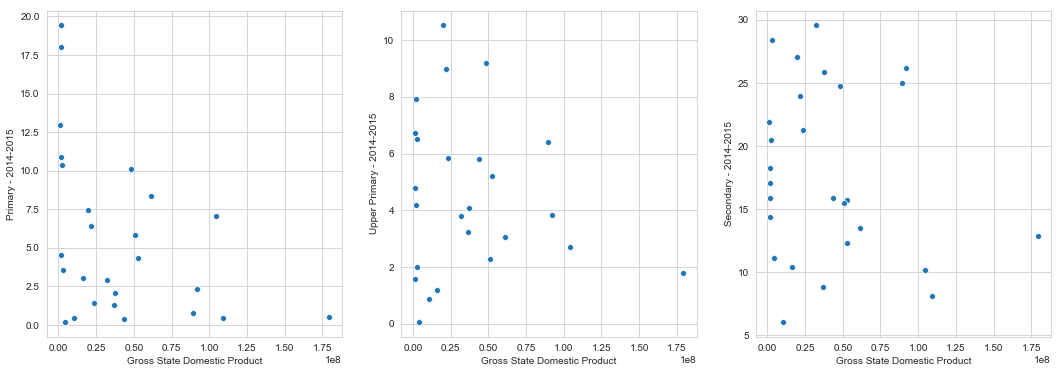

In [350]:
# Plotting the scatter plot to explain the impact of sector GSDP.
fig,ax=plt.subplots(ncols=3,figsize=(18,6))
sns.set_style("whitegrid")
cmap = sns.cubehelix_palette(dark=.9, light=.8, as_cmap=True)
sns.scatterplot(data=mergeddata,x='Gross State Domestic Product',y='Primary - 2014-2015',ax=ax[0])
sns.scatterplot(data=mergeddata,x='Gross State Domestic Product',y='Upper Primary - 2014-2015',ax=ax[1])
sns.scatterplot(data=mergeddata,x='Gross State Domestic Product',y='Secondary - 2014-2015',ax=ax[2])
plt.show()